In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, precision_score
from sklearn import metrics

## 读取数据

In [69]:
train1 = pd.read_table("train.tsv")

In [70]:
train2 = pd.read_table('train_id.tsv')

In [5]:
test = pd.read_table('test_A.tsv')

In [6]:
train1.head()

,PERSONID,APPLYNO,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,...,FTR43,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,CREATETIME
0,8ba94305557a4ec72435a9eb78001350,20fab21284e57a4ccd3127553920e37b,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000832,0.050000,0.0,0.0,0.000000,0.050012,0.0,0.001532,A2B186C398E0D0,2015-09-14
1,8ba94305557a4ec72435a9eb78001350,73f32b8b6e199129abb8fe0cb6d6c867,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.002801,0.033333,0.0,0.0,0.000000,0.033333,0.0,0.005156,A24B176C1239E0D0,2015-09-14
2,8ba94305557a4ec72435a9eb78001350,324da7a0b1a5c1d3b321685d734a9dc8,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-09-14
3,8ba94305557a4ec72435a9eb78001350,341ceb4ae7b0ca1c46653f5a116d4bd2,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-10-16
4,8ba94305557a4ec72435a9eb78001350,ca260c60e62de319e38a475e2455afb8,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.002801,0.050000,0.0,0.0,0.000000,0.050000,0.0,0.005156,A24B176C1239E0D0,2015-10-16


In [7]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368146 entries, 0 to 1368145
Data columns (total 55 columns):
PERSONID      1368146 non-null object
APPLYNO       1368146 non-null object
FTR0          1368146 non-null float64
FTR1          1368146 non-null float64
FTR2          1368146 non-null float64
FTR3          1368146 non-null float64
FTR4          1368146 non-null float64
FTR5          1368146 non-null float64
FTR6          1368146 non-null float64
FTR7          1368146 non-null float64
FTR8          1368146 non-null float64
FTR9          1368146 non-null float64
FTR10         1368146 non-null float64
FTR11         1368146 non-null float64
FTR12         1368146 non-null float64
FTR13         1368146 non-null float64
FTR14         1368146 non-null float64
FTR15         1368146 non-null float64
FTR16         1368146 non-null float64
FTR17         1368146 non-null float64
FTR18         1368146 non-null float64
FTR19         1368146 non-null float64
FTR20         1368146 non-null 

In [8]:
train2.head()

,PERSONID,LABEL
0,8ba94305557a4ec72435a9eb78001350,0
1,505d2a4db5dd353b775b5a30a731c02d,0
2,737f6cee33b47a3857b65186f5f6251e,0
3,3933908961f8e1780ff0b87cc5e4401d,0
4,c15b755463ae71dd54fa4b39d95f5170,0


In [9]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
PERSONID    15000 non-null object
LABEL       15000 non-null int64
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


In [10]:
test.head()

,PERSONID,APPLYNO,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,...,FTR43,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,CREATETIME
0,d7d27cd05dd10be17a9d5339bb1596ad,d6114afdd829c6a24553bdd48ebdbf78,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.000023,0.050012,0.0,0.0,A0B0C6E0D0,2015-03-01
1,d7d27cd05dd10be17a9d5339bb1596ad,12da95c0ac1ff008196939b1706b9786,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.001767,0.050012,0.0,0.0,A0B0C3E0D0,2015-03-01
2,d7d27cd05dd10be17a9d5339bb1596ad,1fe1085070c8a8eeb7ba3b7596c6b271,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000602,0.550000,0.0,0.0,0.000000,0.050000,0.0,0.0,"A2B307C46E0D0,A2B390C540E0D0,A36B257C339E0D0,A...",2015-03-01
3,d7d27cd05dd10be17a9d5339bb1596ad,2b9b3749b7b8d9e7c81814686bb1dba8,0.274993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.025007,0.0,0.0,0.000023,0.025000,0.0,0.0,A0B0C6E0D0,2015-05-31
4,d7d27cd05dd10be17a9d5339bb1596ad,a0e026f43eef17df34e65f5839d11fc2,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.050000,0.0,0.0,0.001767,0.050012,0.0,0.0,A0B0C3E0D0,2015-05-31


#### train1为特征数据，train2为label，test为预测特征，将train数据特征与label合并起来

In [71]:
train = train1.merge(train2, left_on='PERSONID', right_on='PERSONID')

In [6]:
train.head()

,PERSONID,APPLYNO,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,...,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,CREATETIME,LABEL
0,8ba94305557a4ec72435a9eb78001350,20fab21284e57a4ccd3127553920e37b,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.050000,0.0,0.0,0.000000,0.050012,0.0,0.001532,A2B186C398E0D0,2015-09-14,0
1,8ba94305557a4ec72435a9eb78001350,73f32b8b6e199129abb8fe0cb6d6c867,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.033333,0.0,0.0,0.000000,0.033333,0.0,0.005156,A24B176C1239E0D0,2015-09-14,0
2,8ba94305557a4ec72435a9eb78001350,324da7a0b1a5c1d3b321685d734a9dc8,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-09-14,0
3,8ba94305557a4ec72435a9eb78001350,341ceb4ae7b0ca1c46653f5a116d4bd2,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-10-16,0
4,8ba94305557a4ec72435a9eb78001350,ca260c60e62de319e38a475e2455afb8,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.050000,0.0,0.0,0.000000,0.050000,0.0,0.005156,A24B176C1239E0D0,2015-10-16,0


# EDA 探索性数据分析

#### 发现这是一个样本不平衡数据,正负样本比例接近10:1

In [72]:
train.LABEL.value_counts()

0    1237747
1     130399
Name: LABEL, dtype: int64

In [73]:
print("0 占总样本比例为{0}，\n1 占总样本比例为{1}，\n0：1 比例为{2}".format(
                           (train.LABEL.count()-train.LABEL.sum())/train.shape[0],
                           (train.LABEL.sum())/train.shape[0],
                           (train.LABEL.count()-train.LABEL.sum())/train.LABEL.sum()))

0 占总样本比例为0.9046892656193125，
1 占总样本比例为0.09531073438068745，
0：1 比例为9.491997638018697


In [74]:
train.LABEL.value_counts()[1]/train.LABEL.shape

array([0.09531073])

In [75]:
train.head()

,PERSONID,APPLYNO,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,...,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,CREATETIME,LABEL
0,8ba94305557a4ec72435a9eb78001350,20fab21284e57a4ccd3127553920e37b,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.050000,0.0,0.0,0.000000,0.050012,0.0,0.001532,A2B186C398E0D0,2015-09-14,0
1,8ba94305557a4ec72435a9eb78001350,73f32b8b6e199129abb8fe0cb6d6c867,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.033333,0.0,0.0,0.000000,0.033333,0.0,0.005156,A24B176C1239E0D0,2015-09-14,0
2,8ba94305557a4ec72435a9eb78001350,324da7a0b1a5c1d3b321685d734a9dc8,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-09-14,0
3,8ba94305557a4ec72435a9eb78001350,341ceb4ae7b0ca1c46653f5a116d4bd2,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.050000,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-10-16,0
4,8ba94305557a4ec72435a9eb78001350,ca260c60e62de319e38a475e2455afb8,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.050000,0.0,0.0,0.000000,0.050000,0.0,0.005156,A24B176C1239E0D0,2015-10-16,0


#### 可以发现欺诈者的申请记录普遍比较高，可以对申请的次数做一个分箱

In [76]:
train.groupby('PERSONID')['LABEL'].agg(['sum', 'count']).sort_values('sum', ascending=False)

,sum,count
PERSONID,,
263610435a27ba386f61d06a8a05cfaf,1415,1415
d344bea5132a4e88127e4a31aba29c41,992,992
0d8ce23eafab96beb9ad507252184999,866,866
616c5be992e4296f9eb37d5f7a8a6876,845,845
4ce604bd5b742174eedfb083e7209de4,843,843
3cfef57374c79f033673fcbbb28440b0,819,819
be0fcf428b80145c402d3f70898e465a,812,812
66a513943c56c65640b50ee16ecc1fc0,786,786
92e3269d23d04128c641cf9c25c0c0b6,765,765


In [77]:
train.groupby('PERSONID')['LABEL'].agg(['sum', 'count']).sort_values('count', ascending=False)

,sum,count
PERSONID,,
263610435a27ba386f61d06a8a05cfaf,1415,1415
d344bea5132a4e88127e4a31aba29c41,992,992
f91cfe1d586dee2170eabd5778ef3588,0,945
0d8ce23eafab96beb9ad507252184999,866,866
616c5be992e4296f9eb37d5f7a8a6876,845,845
4ce604bd5b742174eedfb083e7209de4,843,843
3cfef57374c79f033673fcbbb28440b0,819,819
be0fcf428b80145c402d3f70898e465a,812,812
66a513943c56c65640b50ee16ecc1fc0,786,786


#### 给train添一条特征，申请次数

In [78]:
apply_count = train.groupby('PERSONID')['LABEL'].count().to_frame()
apply_count.rename(columns={'LABEL':'apply_count'}, inplace=True)
apply_count.head()

,apply_count
PERSONID,
000e3ee6e04a8b18871e1c85ffab6e49,81
000eba50dc8c2e3899070c6b82986814,101
00139506cbd54b670e1e6dec234190e1,39
001de94e8d0d152e26ad87cb409003f9,58
001df6145dea5c48e752d8471544969f,69


In [79]:
train = train.merge(apply_count, left_on='PERSONID', right_index=True, how='left')

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368146 entries, 0 to 1368145
Data columns (total 57 columns):
PERSONID       1368146 non-null object
APPLYNO        1368146 non-null object
FTR0           1368146 non-null float64
FTR1           1368146 non-null float64
FTR2           1368146 non-null float64
FTR3           1368146 non-null float64
FTR4           1368146 non-null float64
FTR5           1368146 non-null float64
FTR6           1368146 non-null float64
FTR7           1368146 non-null float64
FTR8           1368146 non-null float64
FTR9           1368146 non-null float64
FTR10          1368146 non-null float64
FTR11          1368146 non-null float64
FTR12          1368146 non-null float64
FTR13          1368146 non-null float64
FTR14          1368146 non-null float64
FTR15          1368146 non-null float64
FTR16          1368146 non-null float64
FTR17          1368146 non-null float64
FTR18          1368146 non-null float64
FTR19          1368146 non-null float64
FTR20    

#### train1原数据最后一条有nan值，干掉

In [81]:
train = train.iloc[:-1,:]

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368145 entries, 0 to 1368144
Data columns (total 57 columns):
PERSONID       1368145 non-null object
APPLYNO        1368145 non-null object
FTR0           1368145 non-null float64
FTR1           1368145 non-null float64
FTR2           1368145 non-null float64
FTR3           1368145 non-null float64
FTR4           1368145 non-null float64
FTR5           1368145 non-null float64
FTR6           1368145 non-null float64
FTR7           1368145 non-null float64
FTR8           1368145 non-null float64
FTR9           1368145 non-null float64
FTR10          1368145 non-null float64
FTR11          1368145 non-null float64
FTR12          1368145 non-null float64
FTR13          1368145 non-null float64
FTR14          1368145 non-null float64
FTR15          1368145 non-null float64
FTR16          1368145 non-null float64
FTR17          1368145 non-null float64
FTR18          1368145 non-null float64
FTR19          1368145 non-null float64
FTR20    

In [24]:
train.describe()

,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,FTR8,FTR9,...,FTR43,FTR44,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,LABEL,apply_count
count,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,...,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06,1.368145e+06
mean,5.855093e-02,6.901623e-06,5.358765e-05,6.820742e-06,1.254528e-04,2.288104e-04,7.983498e-06,1.250402e-04,5.184896e-05,3.727710e-04,...,3.698680e-04,5.347194e-02,7.962536e-06,2.468332e-05,9.940225e-05,5.705914e-02,1.005304e-05,1.201224e-04,9.531080e-02,1.362567e+02
std,7.568554e-02,6.942327e-04,7.072423e-04,6.939827e-04,7.400493e-04,6.973573e-04,7.484882e-04,7.400278e-04,8.324065e-04,6.429485e-04,...,6.443576e-04,6.112478e-02,2.416337e-04,7.127201e-04,7.143742e-04,7.458933e-02,7.144586e-04,7.319927e-04,2.936439e-01,1.137708e+02
min,4.347826e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.347826e-03,0.000000e+00,0.000000e+00,0.000000e+00,4.347826e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01
50%,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e-02,0.000000e+00,0.000000e+00,5.762762e-06,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.050000e+02
75%,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.249506e-04,...,6.189709e-04,5.000000e-02,0.000000e+00,0.000000e+00,2.305105e-05,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.580000e+02
max,9.099994e-01,2.536921e-01,1.525279e-01,2.542501e-01,1.640532e-01,3.617471e-02,1.294412e-01,1.641625e-01,4.514852e-01,7.379243e-02,...,7.200450e-02,9.526309e-01,6.236983e-02,1.325515e-01,1.171762e-01,6.999997e-01,1.319481e-01,1.325492e-01,1.000000e+00,1.415000e+03


#### 上神器

In [25]:
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp

In [26]:
pp.ProfileReport(train)

Number of variables,57
Number of observations,1368145
Total Missing (%),0.0%
Total size in memory,605.4 MiB
Average record size in memory,464.0 B
Numeric,40
Categorical,3
Boolean,1
Date,0
Text (Unique),1
Rejected,12


## 根据pandas_profiling的分析，有不少相似度极高或者0值非常多的值

### 先看看全0的

#### FTR1

In [82]:
train.FTR1.value_counts()

0.000000    1367876
0.025369        131
0.001384         42
0.050738         36
0.076108         17
0.101477          6
0.027676          5
0.126846          5
0.003690          4
0.015222          4
0.036901          4
0.018450          2
0.009225          1
0.253692          1
0.059964          1
0.013838          1
0.110702          1
0.118082          1
0.177584          1
0.019373          1
0.202954          1
0.026753          1
0.245389          1
0.016605          1
0.044742          1
Name: FTR1, dtype: int64

In [83]:
train.groupby('FTR1')['LABEL'].apply(lambda x:x.sum()/x.count())

FTR1
0.000000    0.095318
0.001384    0.047619
0.003690    0.000000
0.009225    0.000000
0.013838    0.000000
0.015222    0.000000
0.016605    0.000000
0.018450    0.000000
0.019373    0.000000
0.025369    0.007634
0.026753    0.000000
0.027676    0.000000
0.036901    0.000000
0.044742    0.000000
0.050738    0.166667
0.059964    1.000000
0.076108    0.294118
0.101477    0.166667
0.110702    0.000000
0.118082    0.000000
0.126846    0.000000
0.177584    0.000000
0.202954    0.000000
0.245389    0.000000
0.253692    0.000000
Name: LABEL, dtype: float64

#### 可以看到，除了0值，其他值很少，而且没有提供什么有价值的信息，删掉

In [84]:
delete_columns = ['FTR1']

#### FTR13

In [85]:
train.FTR13.value_counts()

0.000000    1367864
0.000092         43
0.000185         16
0.006314         13
0.000262         11
0.000023          9
0.026749          9
0.186588          8
0.000462          8
0.121125          8
0.088203          8
0.027904          7
0.038811          7
0.012168          7
0.015302          6
0.026410          6
0.050085          6
0.000123          5
0.000231          4
0.023335          4
0.106288          4
0.029475          4
0.000174          3
0.000145          3
0.121137          2
0.014748          2
0.028679          2
0.000046          2
0.000616          2
0.186605          2
             ...   
0.018815          1
0.027786          1
0.025529          1
0.015108          1
0.005660          1
0.014304          1
0.005667          1
0.027916          1
0.013485          1
0.046842          1
0.000277          1
0.055562          1
0.002178          1
0.043171          1
0.029657          1
0.113782          1
0.000132          1
0.003160          1
0.091473          1


In [86]:
train.groupby('FTR13')['LABEL'].apply(lambda x:x.sum()/x.count())

FTR13
0.000000    0.095249
0.000023    0.000000
0.000046    0.000000
0.000069    0.000000
0.000092    0.418605
0.000123    0.000000
0.000132    0.000000
0.000134    0.000000
0.000145    0.000000
0.000174    0.000000
0.000185    0.812500
0.000194    0.000000
0.000231    0.500000
0.000246    0.000000
0.000262    0.818182
0.000277    0.000000
0.000293    0.500000
0.000308    0.000000
0.000333    0.000000
0.000462    0.875000
0.000616    0.500000
0.000981    1.000000
0.000986    0.000000
0.001003    0.000000
0.001047    0.000000
0.002005    0.000000
0.002028    0.000000
0.002036    0.000000
0.002178    0.000000
0.002272    1.000000
              ...   
0.027799    0.000000
0.027904    1.000000
0.027916    1.000000
0.028679    1.000000
0.029475    0.000000
0.029657    0.000000
0.035561    0.000000
0.038811    0.000000
0.040814    0.000000
0.043171    0.000000
0.046842    0.000000
0.050085    0.000000
0.054321    0.000000
0.054937    0.000000
0.055562    0.000000
0.085431    0.000000
0.08820

In [87]:
delete_columns.append('FTR13')

#### 同理，选取zero率高于97%的列进行分析
#### 本身在业务逻辑角度，说明这些数据基本上统计不到，或者客户不愿意填的项，其他值算是特例，如果没有强相关规律，不能当做规律来处理

In [88]:
high_zero_col = ["FTR1","FTR13","FTR15","FTR19","FTR20","FTR22","FTR24","FTR25","FTR26","FTR27","FTR31","FTR37","FTR45","FTR49","FTR6",]
def report_unique_feature_label(x):
    print("======{0},zero:{1:02f}%======".format(i, (train[x].value_counts()[0]/train.shape[0])*100))
    _data = pd.DataFrame(train[x].value_counts())
    #好样本率
    _data['G-rate'] = train.groupby(x)['LABEL'].apply(lambda x:x.sum()/x.count())
    _data.columns = ['count','G-rate']
    _data.sort_values('count', inplace=True, ascending=False)
    print(_data)
for i in high_zero_col:
    report_unique_feature_label(i)

======FTR1,zero:99.980338%======
            count    G-rate
0.000000  1367876  0.095318
0.025369      131  0.007634
0.001384       42  0.047619
0.050738       36  0.166667
0.076108       17  0.294118
0.101477        6  0.166667
0.027676        5  0.000000
0.126846        5  0.000000
0.036901        4  0.000000
0.015222        4  0.000000
0.003690        4  0.000000
0.018450        2  0.000000
0.177584        1  0.000000
0.016605        1  0.000000
0.245389        1  0.000000
0.026753        1  0.000000
0.202954        1  0.000000
0.019373        1  0.000000
0.009225        1  0.000000
0.118082        1  0.000000
0.110702        1  0.000000
0.013838        1  0.000000
0.059964        1  1.000000
0.253692        1  0.000000
0.044742        1  0.000000
======FTR13,zero:99.979461%======
            count    G-rate
0.000000  1367864  0.095249
0.000092       43  0.418605
0.000185       16  0.812500
0.006314       13  0.769231
0.000262       11  0.818182
0.000023        9  0.000000
0.026749 

            count    G-rate
0.000000  1340164  0.094925
0.000022     2502  0.037570
0.000097     1325  0.008302
0.000045      872  0.134174
0.000030      803  0.012453
0.000149      534  0.024345
0.000223      357  0.002801
0.000159      352  0.000000
0.000079      352  0.485795
0.000112      330  0.066667
0.000186      310  0.161290
0.000093      304  0.006579
0.000060      278  0.050360
0.000119      242  0.012397
0.000026      239  0.062762
0.000199      218  0.174312
0.000040      186  0.005376
0.000037      180  0.266667
0.000089      176  0.505682
0.000015      172  1.000000
0.000019      161  0.000000
0.000298      131  0.000000
0.000013      122  0.221311
0.000212      112  0.607143
0.000101      111  0.009009
0.000010      111  0.468468
0.000050       98  0.020408
0.000052       95  0.157895
0.000074       93  0.344086
0.000024       93  0.053763
...           ...       ...
0.004284        1  0.000000
0.008890        1  0.000000
0.004828        1  0.000000
0.003016        1  0

#### 根据上面的分析，FTR20，FTR25,FTR27,FTR45对结果有比较大的影响，影响较弱，或者其他数量太少

In [89]:
high_zero_col_reserve = ["FTR20","FTR25","FTR27","FTR45"]
high_zero_col_del = [x for x in high_zero_col if x not in high_zero_col_reserve]

In [90]:
delete_columns.extend(high_zero_col_del)

In [91]:
delete_columns

['FTR1',
 'FTR13',
 'FTR1',
 'FTR13',
 'FTR15',
 'FTR19',
 'FTR22',
 'FTR24',
 'FTR26',
 'FTR31',
 'FTR37',
 'FTR49',
 'FTR6']

### 然后再分析相关性极高的几个特征
FTR29 & FTR10 : ρ = 0.92204  
FTR3 & FTR1 : ρ = 0.99996  
FTR30 & FTR28 : ρ = 0.96428  
FTR36 & FTR33 : ρ = 0.91125  
FTR38 & FTR12 : ρ = 0.97714  
FTR39 & FTR7 : ρ = 0.95815  
FTR40 & FTR20 : ρ = 1  
FTR41 & FTR36 : ρ = 0.91804  
FTR43 & FTR9 : ρ = 0.99928  
FTR46 & FTR37 : ρ = 0.99939  
FTR47 & FTR16 : ρ = 0.99883  
FTR7 & FTR4 : ρ = 0.99979
#### 注：经试验，去掉后分数有所下降，所以暂时注释掉，等调参完成之后，再来重新实验

In [37]:
'''
train[train.FTR29 != train.FTR10].LABEL.value_counts()

def report_high_corr(col1, col2):
    """输出高相关性的两列不同元素的正负样本比例"""
    print("====={0} corr {1}======".format(col1,col2))
    print(train[train[col1] != train[col2]].LABEL.value_counts()[1] / train[train[col1] != train[col2]].shape[0])

high_corr_cols = [("FTR29","FTR10"),("FTR3","FTR1"),("FTR30","FTR28"),("FTR36","FTR33"),("FTR38","FTR12"),
                  ("FTR39","FTR7"),("FTR40","FTR20"),("FTR41","FTR36"),("FTR43","FTR9"),("FTR46","FTR37"),
                  ("FTR47","FTR16"),("FTR7","FTR4")]
for i,j in high_corr_cols:
    report_high_corr(i,j)
#### 考虑到后续的随机森林可以自动过滤掉相关性高的项，先不删除

high_corr_del = ["FTR3","FTR30","FTR38","FTR39","FTR40","FTR43","FTR46","FTR47","FTR7"]
delete_columns.extend(high_corr_del)
'''

0    104974
1     11195
Name: LABEL, dtype: int64

#### 由下面的图可以看出，虽然相关性比较大，但是，实际上仅仅是因为两个值大部分都是同一个数的缘故，顾相关性高的特性可以先暂时不管了

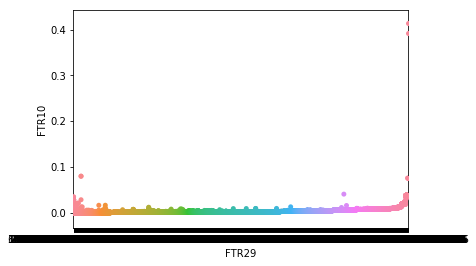

In [43]:
sns.stripplot('FTR29','FTR10',data=train)

In [42]:
train.head()

,PERSONID,APPLYNO,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,...,FTR45,FTR46,FTR47,FTR48,FTR49,FTR50,FTR51,CREATETIME,LABEL,apply_count
0,8ba94305557a4ec72435a9eb78001350,20fab21284e57a4ccd3127553920e37b,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.050012,0.0,0.001532,A2B186C398E0D0,2015-09-14,0,25
1,8ba94305557a4ec72435a9eb78001350,73f32b8b6e199129abb8fe0cb6d6c867,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.0,0.0,0.000000,0.033333,0.0,0.005156,A24B176C1239E0D0,2015-09-14,0,25
2,8ba94305557a4ec72435a9eb78001350,324da7a0b1a5c1d3b321685d734a9dc8,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-09-14,0,25
3,8ba94305557a4ec72435a9eb78001350,341ceb4ae7b0ca1c46653f5a116d4bd2,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000023,0.050000,0.0,0.000000,A0B0C6E0D0,2015-10-16,0,25
4,8ba94305557a4ec72435a9eb78001350,ca260c60e62de319e38a475e2455afb8,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,0.0,0.0,0.000000,0.050000,0.0,0.005156,A24B176C1239E0D0,2015-10-16,0,25


## 构造特征

#### FTR51

In [92]:
print(train.FTR51.nunique())
print(train.FTR51.unique())

332654
['A2B186C398E0D0' 'A24B176C1239E0D0' 'A0B0C6E0D0' ...
 'A0B0C10E0D0,A0B0C3773E0D0,A0B0C176E0D0'
 'A0B0C10E0D0,A0B0C191E0D0,A0B0C63E0D0,A0B0C14E0D0,A0B0C67E0D0'
 'A0B0C67E0D0,A0B0C14E0D0,A0B0C63E0D0,A0B0C10E0D0,A0B0C191E0D0,A0B0C3333E0D0']


In [93]:
# 嗯，种类数量有点多，但是看起来无一例外，都是A..B..C..E..D..的格式,那么里面的数字可以当做一个特征来用
import re
def get_FTR51_number(value):
    matchs = re.match(r'A(\d+)B(\d+)C(\d+)E(\d+)D(\d+)', value)
    return matchs.groups()

In [94]:
#且分出数字特征来，然后每一项作为一个特征
FTR51_split = train.FTR51.apply(get_FTR51_number)

FTR51_split_values = pd.DataFrame(FTR51_split.tolist(), columns=(['FTR51_'+x for x in 'ABCED']))

In [95]:
FTR51_split_values.head()

,FTR51_A,FTR51_B,FTR51_C,FTR51_E,FTR51_D
0,2,186,398,0,0
1,24,176,1239,0,0
2,0,0,6,0,0
3,0,0,6,0,0
4,24,176,1239,0,0


In [96]:
train = train.merge(FTR51_split_values, left_index=True, right_index=True)

#### 然后看一下与时间有关的特征

In [97]:
train.CREATETIME = pd.to_datetime(train.CREATETIME, format="%Y-%m-%d")

In [98]:
print(train.CREATETIME.nunique())
train.CREATETIME.max()-train.CREATETIME.min()

188


Timedelta('359 days 00:00:00')

In [99]:
#看一下每一天每个人申请的次数,按拒绝次数排序
train.groupby(['CREATETIME','PERSONID'])['LABEL'].agg(['sum','count']).sort_values('sum', ascending=False)

,,sum,count
CREATETIME,PERSONID,,
2015-12-07,58af8c74915f5d2f48945f54ca337716,20,20
2015-03-06,263610435a27ba386f61d06a8a05cfaf,19,19
2016-01-14,263610435a27ba386f61d06a8a05cfaf,17,17
2016-02-21,263610435a27ba386f61d06a8a05cfaf,17,17
2015-04-02,4ce604bd5b742174eedfb083e7209de4,17,17
2015-09-09,4ce604bd5b742174eedfb083e7209de4,16,16
2016-02-07,263610435a27ba386f61d06a8a05cfaf,16,16
2015-11-21,cf2d94c8f430141e4ee23dbef7b126ca,16,16
2016-02-06,d344bea5132a4e88127e4a31aba29c41,15,15


In [100]:
#看一下每一天每个人申请的次数,按申请次数排序
train.groupby(['CREATETIME','PERSONID'])['LABEL'].agg(['max','count']).sort_values('count', ascending=False)

,,max,count
CREATETIME,PERSONID,,
2016-02-15,4104e34c91ed009cb84db7f893560b57,0,42
2015-03-05,0d4713e8c086c5538f5a1ebd92a2539d,0,42
2015-03-06,c1d32ac9d9f481fb965bf3785f4b085d,0,42
2015-12-06,c1d32ac9d9f481fb965bf3785f4b085d,0,40
2016-02-19,4104e34c91ed009cb84db7f893560b57,0,40
2015-03-05,4104e34c91ed009cb84db7f893560b57,0,40
2016-02-18,035b71ac4326fed1f1422c17700ddcc3,0,40
2015-11-05,4104e34c91ed009cb84db7f893560b57,0,40
2016-01-07,0d4713e8c086c5538f5a1ebd92a2539d,0,39


In [101]:
_apply_count_by_day = train.groupby(['CREATETIME','PERSONID'])['LABEL'].agg(['count'])

In [102]:
_apply_count_by_day.rename(columns={'count':"apply_count_by_day"}, inplace=True)

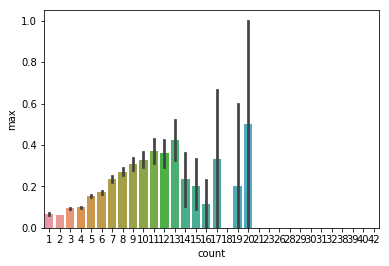

In [36]:
sns.barplot('count','max', data=_apply_count_by_day, )

#### 由此可见，随着申请次数增多，正例开始变多，但是多到一定次数之后，反而是欺诈者的概率在下降，这也是一个有效特征

In [103]:
train = train.merge(_apply_count_by_day, left_on=['CREATETIME','PERSONID'], right_on=['CREATETIME','PERSONID'])

In [104]:
train[['FTR51_A', 'FTR51_B', 'FTR51_C', 'FTR51_E', 'FTR51_D']] = train[['FTR51_A', 'FTR51_B', 'FTR51_C', 'FTR51_E','FTR51_D']].astype('int64')

In [105]:
train.head()

,PERSONID,APPLYNO,FTR0,FTR1,FTR2,FTR3,FTR4,FTR5,FTR6,FTR7,...,FTR51,CREATETIME,LABEL,apply_count,FTR51_A,FTR51_B,FTR51_C,FTR51_E,FTR51_D,apply_count_by_day
0,8ba94305557a4ec72435a9eb78001350,20fab21284e57a4ccd3127553920e37b,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,A2B186C398E0D0,2015-09-14,0,25,2,186,398,0,0,3
1,8ba94305557a4ec72435a9eb78001350,73f32b8b6e199129abb8fe0cb6d6c867,0.033333,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,A24B176C1239E0D0,2015-09-14,0,25,24,176,1239,0,0,3
2,8ba94305557a4ec72435a9eb78001350,324da7a0b1a5c1d3b321685d734a9dc8,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,A0B0C6E0D0,2015-09-14,0,25,0,0,6,0,0,3
3,8ba94305557a4ec72435a9eb78001350,341ceb4ae7b0ca1c46653f5a116d4bd2,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,A0B0C6E0D0,2015-10-16,0,25,0,0,6,0,0,3
4,8ba94305557a4ec72435a9eb78001350,ca260c60e62de319e38a475e2455afb8,0.050000,0.0,0.0,0.0,0.0,0.007829,0.0,0.0,...,A24B176C1239E0D0,2015-10-16,0,25,24,176,1239,0,0,3


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368145 entries, 0 to 1368144
Data columns (total 63 columns):
PERSONID              1368145 non-null object
APPLYNO               1368145 non-null object
FTR0                  1368145 non-null float64
FTR1                  1368145 non-null float64
FTR2                  1368145 non-null float64
FTR3                  1368145 non-null float64
FTR4                  1368145 non-null float64
FTR5                  1368145 non-null float64
FTR6                  1368145 non-null float64
FTR7                  1368145 non-null float64
FTR8                  1368145 non-null float64
FTR9                  1368145 non-null float64
FTR10                 1368145 non-null float64
FTR11                 1368145 non-null float64
FTR12                 1368145 non-null float64
FTR13                 1368145 non-null float64
FTR14                 1368145 non-null float64
FTR15                 1368145 non-null float64
FTR16                 1368145 non-null floa

### 特征处理完之后的数据

In [107]:
#删除不要的列
delete_columns = list(set(delete_columns))
train.drop(delete_columns, inplace=True, axis=1)

In [108]:
train.head()

,PERSONID,APPLYNO,FTR0,FTR2,FTR3,FTR4,FTR5,FTR7,FTR8,FTR9,...,FTR51,CREATETIME,LABEL,apply_count,FTR51_A,FTR51_B,FTR51_C,FTR51_E,FTR51_D,apply_count_by_day
0,8ba94305557a4ec72435a9eb78001350,20fab21284e57a4ccd3127553920e37b,0.050000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000768,...,A2B186C398E0D0,2015-09-14,0,25,2,186,398,0,0,3
1,8ba94305557a4ec72435a9eb78001350,73f32b8b6e199129abb8fe0cb6d6c867,0.033333,0.0,0.0,0.0,0.007829,0.0,0.0,0.002870,...,A24B176C1239E0D0,2015-09-14,0,25,24,176,1239,0,0,3
2,8ba94305557a4ec72435a9eb78001350,324da7a0b1a5c1d3b321685d734a9dc8,0.050000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,A0B0C6E0D0,2015-09-14,0,25,0,0,6,0,0,3
3,8ba94305557a4ec72435a9eb78001350,341ceb4ae7b0ca1c46653f5a116d4bd2,0.050000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,A0B0C6E0D0,2015-10-16,0,25,0,0,6,0,0,3
4,8ba94305557a4ec72435a9eb78001350,ca260c60e62de319e38a475e2455afb8,0.050000,0.0,0.0,0.0,0.007829,0.0,0.0,0.002870,...,A24B176C1239E0D0,2015-10-16,0,25,24,176,1239,0,0,3


#### 不平衡数据处理

In [30]:
def get_balance_data():
    index_0 = train[train['LABEL']==0].index
    index_1 = train[train['LABEL']==1].index
    index_0_choice = np.random.choice(index_0, len(index_1))
    return train.iloc[np.hstack((index_0_choice, index_1)), :]

In [31]:
train_old = train
train = get_balance_data()
train.reset_index(inplace=True, drop=True)

In [32]:
train.head()

,PERSONID,APPLYNO,FTR0,FTR2,FTR3,FTR4,FTR5,FTR7,FTR8,FTR9,...,FTR51,CREATETIME,LABEL,apply_count,FTR51_A,FTR51_B,FTR51_C,FTR51_E,FTR51_D,apply_count_by_day
0,ac0142f936877f10e9363451187d5c1f,534f7d43b00b8180641f6c5592b8a446,0.05,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,"A0B0C7E0D0,A0B0C10E5D3",2015-04-02,0,153,0,0,7,0,0,6
1,4e0c0567c4529c489a8ec66e2d5dcc8e,455530afbb1a9ffae62009198abb543f,0.05,0.0,0.0,0.000000,0.000359,0.000000,5.824052e-07,0.000532,...,"A3B457C208E0D0,A18B2264C1642E0D0,A2B434C607E0D0",2015-11-21,0,210,3,457,208,0,0,4
2,c6686d42737151f0b6b3b310c66c6271,6381ef3ef12544a41c9d76c1b294e0bf,0.05,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,A0B0C0E0D0,2015-09-04,0,91,0,0,0,0,0,1
3,d7f5610cd263fdee7efe02de901a677b,6431bac4fa528301cf732f1ca9400ea4,0.05,0.0,0.0,0.000028,0.000000,0.000028,0.000000e+00,0.000000,...,A0B0C14E0D0,2015-12-20,0,150,0,0,14,0,0,1
4,309964e9afc94fce8139555fc037abc2,62a103f12a7b09fd9444f3b74a44c3fb,0.05,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000220,...,"A47B74C70E0D0,A47B74C214E0D0,A47B74C312E0D0,A4...",2016-02-10,0,88,47,74,70,0,0,2


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260798 entries, 0 to 260797
Data columns (total 64 columns):
PERSONID       260798 non-null object
APPLYNO        260798 non-null object
FTR0           260798 non-null float64
FTR1           260798 non-null float64
FTR2           260798 non-null float64
FTR3           260798 non-null float64
FTR4           260798 non-null float64
FTR5           260798 non-null float64
FTR6           260798 non-null float64
FTR7           260798 non-null float64
FTR8           260798 non-null float64
FTR9           260798 non-null float64
FTR10          260798 non-null float64
FTR11          260798 non-null float64
FTR12          260798 non-null float64
FTR13          260798 non-null float64
FTR14          260798 non-null float64
FTR15          260798 non-null float64
FTR16          260798 non-null float64
FTR17          260798 non-null float64
FTR18          260798 non-null float64
FTR19          260798 non-null float64
FTR20          260798 non-null fl

## 训练模型，预测

### 切分数据集

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
def report_metrics(y_true, y_pred):
    _acc = accuracy_score(y_true, y_pred)
    _recall = recall_score(y_true, y_pred)
    _fpr,_tpr,_thred = roc_curve(y_true, y_pred)
    _auc = auc(_fpr,_tpr)
    print("accuracy: {0}, recall: {1}, auc:{2}".format(_acc,_recall,_auc))

In [35]:
train.columns

Index(['PERSONID', 'APPLYNO', 'FTR0', 'FTR2', 'FTR3', 'FTR4', 'FTR5', 'FTR7',
       'FTR8', 'FTR9', 'FTR10', 'FTR11', 'FTR12', 'FTR14', 'FTR16', 'FTR17',
       'FTR18', 'FTR20', 'FTR21', 'FTR23', 'FTR25', 'FTR27', 'FTR28', 'FTR29',
       'FTR30', 'FTR32', 'FTR33', 'FTR34', 'FTR35', 'FTR36', 'FTR38', 'FTR39',
       'FTR40', 'FTR41', 'FTR42', 'FTR43', 'FTR44', 'FTR45', 'FTR46', 'FTR47',
       'FTR48', 'FTR50', 'FTR51', 'CREATETIME', 'LABEL', 'apply_count',
       'FTR51_A', 'FTR51_B', 'FTR51_C', 'FTR51_E', 'FTR51_D',
       'apply_count_by_day'],
      dtype='object')

In [36]:
train_columns = train.columns
train_coloumns_filter = ['PERSONID', 'APPLYNO','FTR51','CREATETIME', 'LABEL',]
train_columns = [x for x in train_columns if x not in train_coloumns_filter]
x_train, x_test, y_train, y_test = train_test_split(train[train_columns], train['LABEL'])

#### 随机森林模型

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rfc = RandomForestClassifier(n_estimators=1500, max_depth=8, min_samples_split=10, random_state=10,n_jobs=4)
model_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=4,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [51]:
rfc_pred = model_rfc.predict(x_test)

#### 评价指标

In [52]:
rfc_acc = accuracy_score(y_test, rfc_pred)
print("accuracy is :{0}".format(rfc_acc))

accuracy is :0.939044606285285


In [53]:
rfc_recall = recall_score(y_test, rfc_pred)
print('recall is {}'.format(rfc_recall))

recall is 0.43341092869394754


#### xgb模型

In [37]:
import xgboost as xgb

In [126]:
model_xgb = xgb.XGBClassifier(booster='gbtree', max_depth=7, learning_rate=0.05, n_estimators=1500, scale_pos_weight=1, n_jobs=4)

In [127]:
model_xgb.fit(x_train, y_train, eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
       silent=True, subsample=1)

In [131]:
xgb_pred = model_xgb.predict(x_test)

/home/dax/soft/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [132]:
report_metrics(y_test, xgb_pred)

accuracy: 0.8969171779141104, recall: 0.9299990789352491, auc:0.8969465804434436


<Figure size 3600x1440 with 0 Axes>

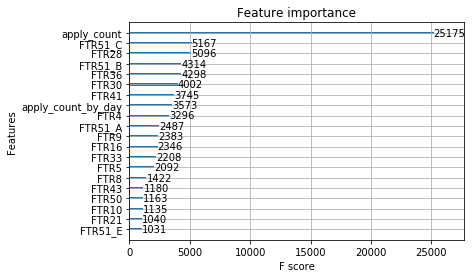

In [133]:
from xgboost import plot_importance
plt.figure(figsize=(50,20))
plot_importance(model_xgb, max_num_features=20)

In [148]:
#预测到同一个人的多个结果，只要有一个为1，则该人就是1
from sklearn.preprocessing import Binarizer
def report_person_pred_metric(y_true, y_pred):
    _x_test = x_test
    _x_test['PERSONID'] = train.loc[x_test.index,"PERSONID"]
    _x_test['test_true'] = y_true
    _x_test['test_pred'] = y_pred
    _y_true_unique = _x_test.groupby('PERSONID')['test_true'].max()
    _y_pred_unique = _x_test.groupby('PERSONID')['test_pred'].mean()
    _y_pred_unique = [0 if x < 0.5 else 1 for x in _y_pred_unique]
    _x_test.drop(['PERSONID','test_true','test_pred'], inplace=True, axis=1)
    return _y_true_unique,_y_pred_unique

In [149]:
report_metrics(*report_person_pred_metric(y_test, xgb_pred))

accuracy: 0.9777934437786394, recall: 0.9631432545201669, auc:0.9779976458447868


#### 神经网络

In [67]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [65]:
model = Sequential()

In [70]:
model.add(Dense(64, input_dim=len(x_train.columns), activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [93]:
model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=200,
    validation_data=(x_test,y_test)
)

Train on 195598 samples, validate on 65200 samples
Epoch 1/200
195598/195598 [==============================] - 1s 8us/step - loss: 0.4441 - acc: 0.7980 - val_loss: 0.4380 - val_acc: 0.8008
Epoch 2/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4364 - acc: 0.8011 - val_loss: 0.4395 - val_acc: 0.8002
Epoch 3/200
195598/195598 [==============================] - 1s 8us/step - loss: 0.4361 - acc: 0.8011 - val_loss: 0.4376 - val_acc: 0.8013
Epoch 4/200
195598/195598 [==============================] - 2s 8us/step - loss: 0.4359 - acc: 0.8016 - val_loss: 0.4383 - val_acc: 0.7996
Epoch 5/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4357 - acc: 0.8018 - val_loss: 0.4380 - val_acc: 0.7998
Epoch 6/200
195598/195598 [==============================] - 1s 8us/step - loss: 0.4359 - acc: 0.8017 - val_loss: 0.4389 - val_acc: 0.8005
Epoch 7/200
195598/195598 [==============================] - 2s 8us/step - loss: 0.4354 - acc: 0.8021 - val_loss: 0

195598/195598 [==============================] - 1s 7us/step - loss: 0.4311 - acc: 0.8034 - val_loss: 0.4317 - val_acc: 0.8011
Epoch 118/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4305 - acc: 0.8036 - val_loss: 0.4350 - val_acc: 0.8011
Epoch 119/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4300 - acc: 0.8032 - val_loss: 0.4317 - val_acc: 0.8034
Epoch 120/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4304 - acc: 0.8038 - val_loss: 0.4328 - val_acc: 0.8016
Epoch 121/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4306 - acc: 0.8032 - val_loss: 0.4307 - val_acc: 0.8036
Epoch 122/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4299 - acc: 0.8037 - val_loss: 0.4311 - val_acc: 0.8018
Epoch 123/200
195598/195598 [==============================] - 1s 7us/step - loss: 0.4303 - acc: 0.8037 - val_loss: 0.4316 - val_acc: 0.8023
Epoch 124/200
195598/195598

In [96]:
neural_pred = model.predict(x_test)

neural_pred = [0 if x <0.5 else 1 for x in neural_pred]

In [97]:
report_metrics(y_test, neural_pred)

accuracy: 0.8022546012269939, recall: 0.7279616219024048, auc:0.8025451567153756
